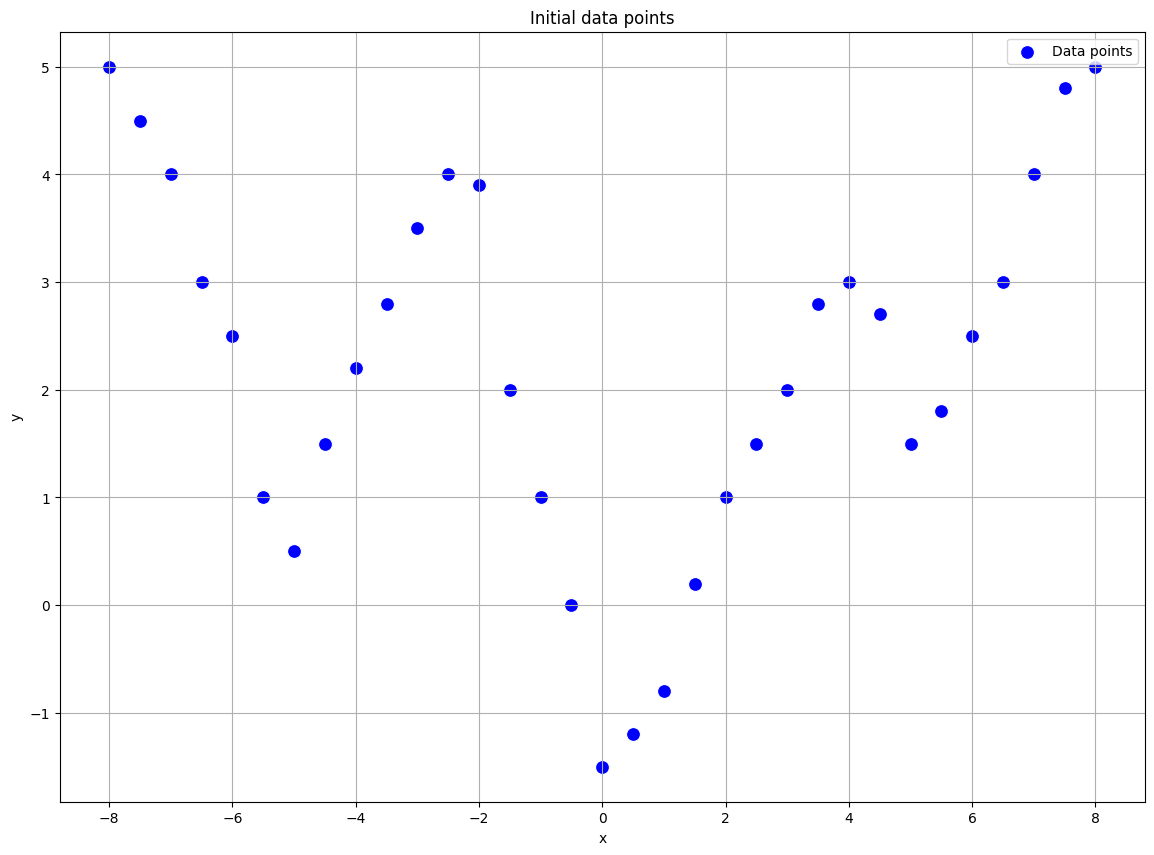

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

x = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5,
              0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])
y = np.array([5.0, 4.5, 4.0, 3.0, 2.5, 1.0, 0.5, 1.5, 2.2, 2.8, 3.5, 4.0, 3.9, 2.0, 1.0, 0.0,
              -1.5, -1.2, -0.8, 0.2, 1.0, 1.5, 2.0, 2.8, 3.0, 2.7, 1.5, 1.8, 2.5, 3.0, 4.0, 4.8, 5.0])
fig, ax  = plt.subplots(figsize=(14, 10))

sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data points', ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Initial data points")
ax.legend()
ax.grid(True)
ax.set_aspect('auto')

BIC for polynomial with degree 1 : 42.597776124875445
BIC for polynomial with degree 2 : 24.19876821829058
BIC for polynomial with degree 3 : 27.009105060011176
BIC for polynomial with degree 4 : 30.3980177739491
BIC for polynomial with degree 5 : 30.626922637052125
BIC for polynomial with degree 6 : 27.189413943430264
BIC for polynomial with degree 7 : 24.84250273893877
BIC for polynomial with degree 8 : -9.314143969914728
BIC for polynomial with degree 9 : -14.6600552887542
BIC for polynomial with degree 10 : -46.42357020658049
BIC for polynomial with degree 11 : -43.06112309330057
BIC for polynomial with degree 12 : -41.05333604827845
BIC for polynomial with degree 13 : -40.05328376818584
BIC for polynomial with degree 14 : -36.73710170279496


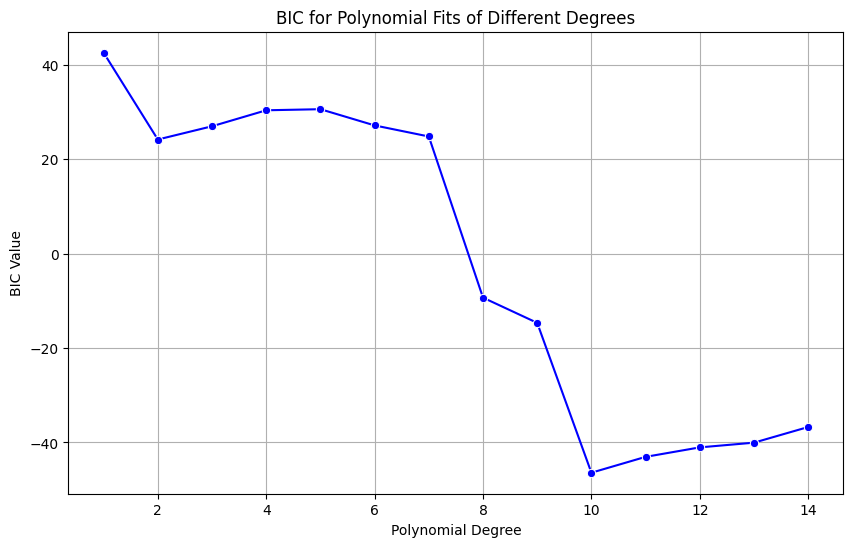

In [3]:
def compute_bic_for_poly(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    
    n = len(y)
    
    rss = np.sum((y - y_pred) ** 2)
    
    k = degree + 1
    
    bic = n * np.log(rss / n) + k * np.log(n)
    
    return bic

bic_values = []
degrees = range(1, 15) 

for degree in degrees:
    bic = compute_bic_for_poly(x, y, degree)
    bic_values.append(bic)
    print(f"BIC for polynomial with degree {degree} : {bic}")

plt.figure(figsize=(10, 6))
sns.lineplot(x=degrees, y=bic_values, marker="o", color="blue")
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC for Polynomial Fits of Different Degrees')
plt.grid(True)
plt.show()

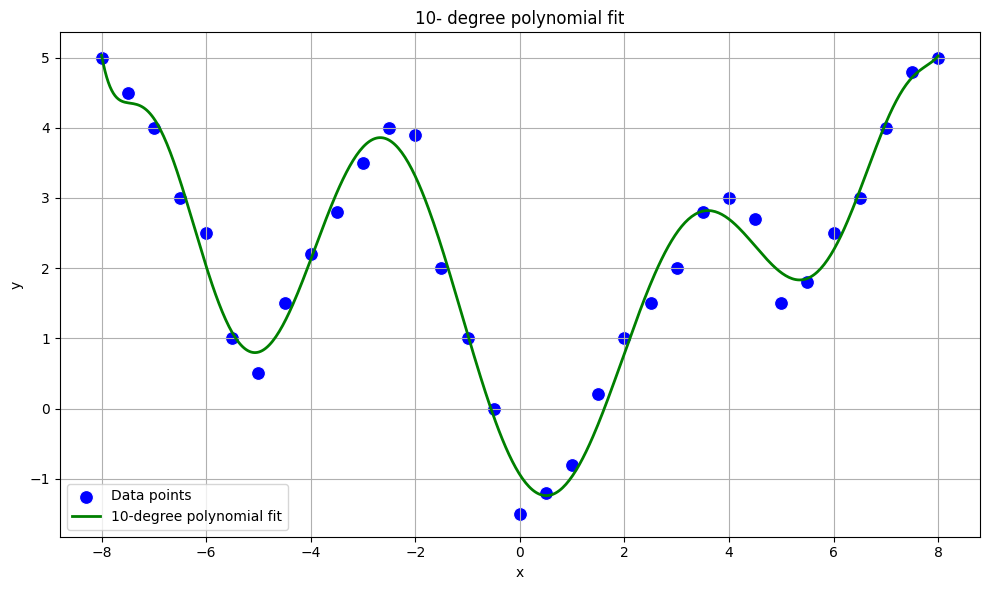

           10             9             8             7            6
2.595e-07 x  - 6.988e-07 x - 4.903e-05 x + 0.0001164 x + 0.003343 x
             5           4          3         2
 - 0.006783 x - 0.09665 x + 0.1589 x + 1.084 x - 1.164 x - 0.9433


In [9]:
degree = 10
coeffs = np.polyfit(x, y, degree)
poly = np.poly1d(coeffs)

x_smooth = np.linspace(min(x), max(x), 500)
y_2_smooth = poly(x_smooth)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data points', ax=ax)
sns.lineplot(x=x_smooth, y=y_2_smooth, color='green',
             label=f'{degree}-degree polynomial fit', linewidth=2, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'{degree}- degree polynomial fit')
ax.legend()
ax.grid(True)
ax.set_aspect('auto')

plt.tight_layout()
plt.show()

print(np.poly1d(coeffs))

/tmp/ipykernel_6662/818847025.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


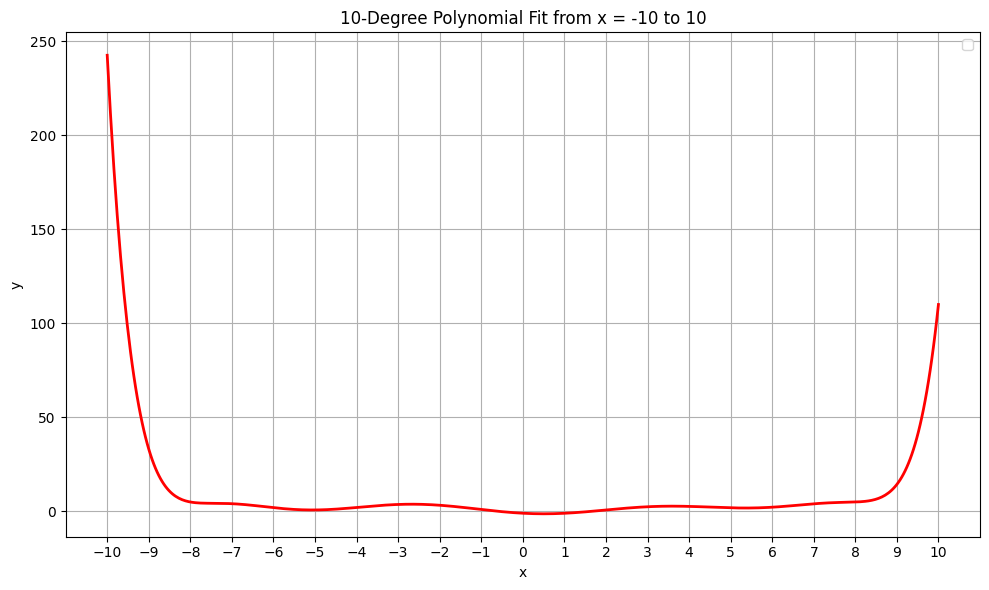

In [14]:
x_extended_10 = np.linspace(-10, 10, 500)
y_extended_10 = poly(x_extended_10)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))


sns.lineplot(x=x_extended_10, y=y_extended_10, color='red', linewidth=2, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'{degree}-Degree Polynomial Fit from x = -10 to 10')
ax.legend()
ax.grid(True)
ax.set_aspect('auto')
ax.set_xticks(np.arange(-10, 11, 1))

plt.tight_layout()
plt.show()

In [26]:
def dichotomy_minimize(f, a, b, tol=1e-5, max_iter=100000):
    delta = tol / 2
    iter_count = 0
    while abs(b - a) > tol and iter_count < max_iter:
        mid = (a + b) / 2
        left = mid - delta
        right = mid + delta
        if f(left) < f(right):
            b = right
        else:
            a = left
        iter_count += 1
    if iter_count >= max_iter:
        print("Warning: Maximum iterations reached without convergence")
    print(f"Number of iterations of dichotomy method: {iter_count}")
    return (a + b) / 2

f_12 = np.poly1d(coeffs)
min_dichotomy = dichotomy_minimize(f_12, -2, 2)
print(f"x_min using dichotomy method: {min_dichotomy:.4f}")
print(f"f(x_min) using dichotomy method: {f_12(min_dichotomy):.4f}")

Number of iterations of dichotomy method: 100000
x_min using dichotomy method: 0.5047
f(x_min) using dichotomy method: -1.2409


In [24]:
def golden_ratio_minimize(f, a, b, tol=1e-5):
    golden_ratio = (1 + np.sqrt(5)) / 2
    iter_count = 0
    c = b - (b - a) / golden_ratio
    d = a + (b - a) / golden_ratio
    
    while abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio
        iter_count += 1

    print(f"Number of iterations of golden ratio method: {iter_count}")
    
    return (a + b) / 2 

min_golden_ratio = golden_ratio_minimize(f_12, -2, 2)

print(f"x_min using golden ratio method: {min_golden_ratio:.4f}")
print(f"f(x_min) using golden ratio method: {f_12(min_golden_ratio):.4f}")

Number of iterations of golden ratio method: 27
x_min using golden ratio method: 0.5047
f(x_min) using golden ratio method: -1.2409


In [27]:
def newton_minimize(f, df, d2f, x0, tol=1e-5, max_iter=100):
    x = x0
    for _ in range(max_iter):
        f_prime = df(x)
        f_double_prime = d2f(x)
        
        if abs(f_prime) < tol:
            print(f"Number of iterations of Newton's method: {_}")
            break
        
        x = x - f_prime / f_double_prime
    
    return x


f_prime_12 = f_12.deriv()  
f_double_prime_12 = f_prime_12.deriv()

min_newton = newton_minimize(f_12, f_prime_12, f_double_prime_12, x0=0)
print(f"x_min using Newton's method: {min_newton:.4f}")
print(f"f(x_min) using Newton's method: {f_12(min_newton):.4f}")

Number of iterations of Newton's method: 3
x_min using Newton's method: 0.5047
f(x_min) using Newton's method: -1.2409
